In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [61]:

df = pd.read_csv(r'C:\Users\VISHAL K\OneDrive\Desktop\Netflix Userbase.csv', encoding= 'unicode_escape')

In [63]:
df.shape

(2500, 10)

In [64]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [66]:
pd.isnull(df).sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [69]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [71]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [72]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


# Exploratory Data Analysis

### plotting a bar chart for Country vs Monthly Revenue

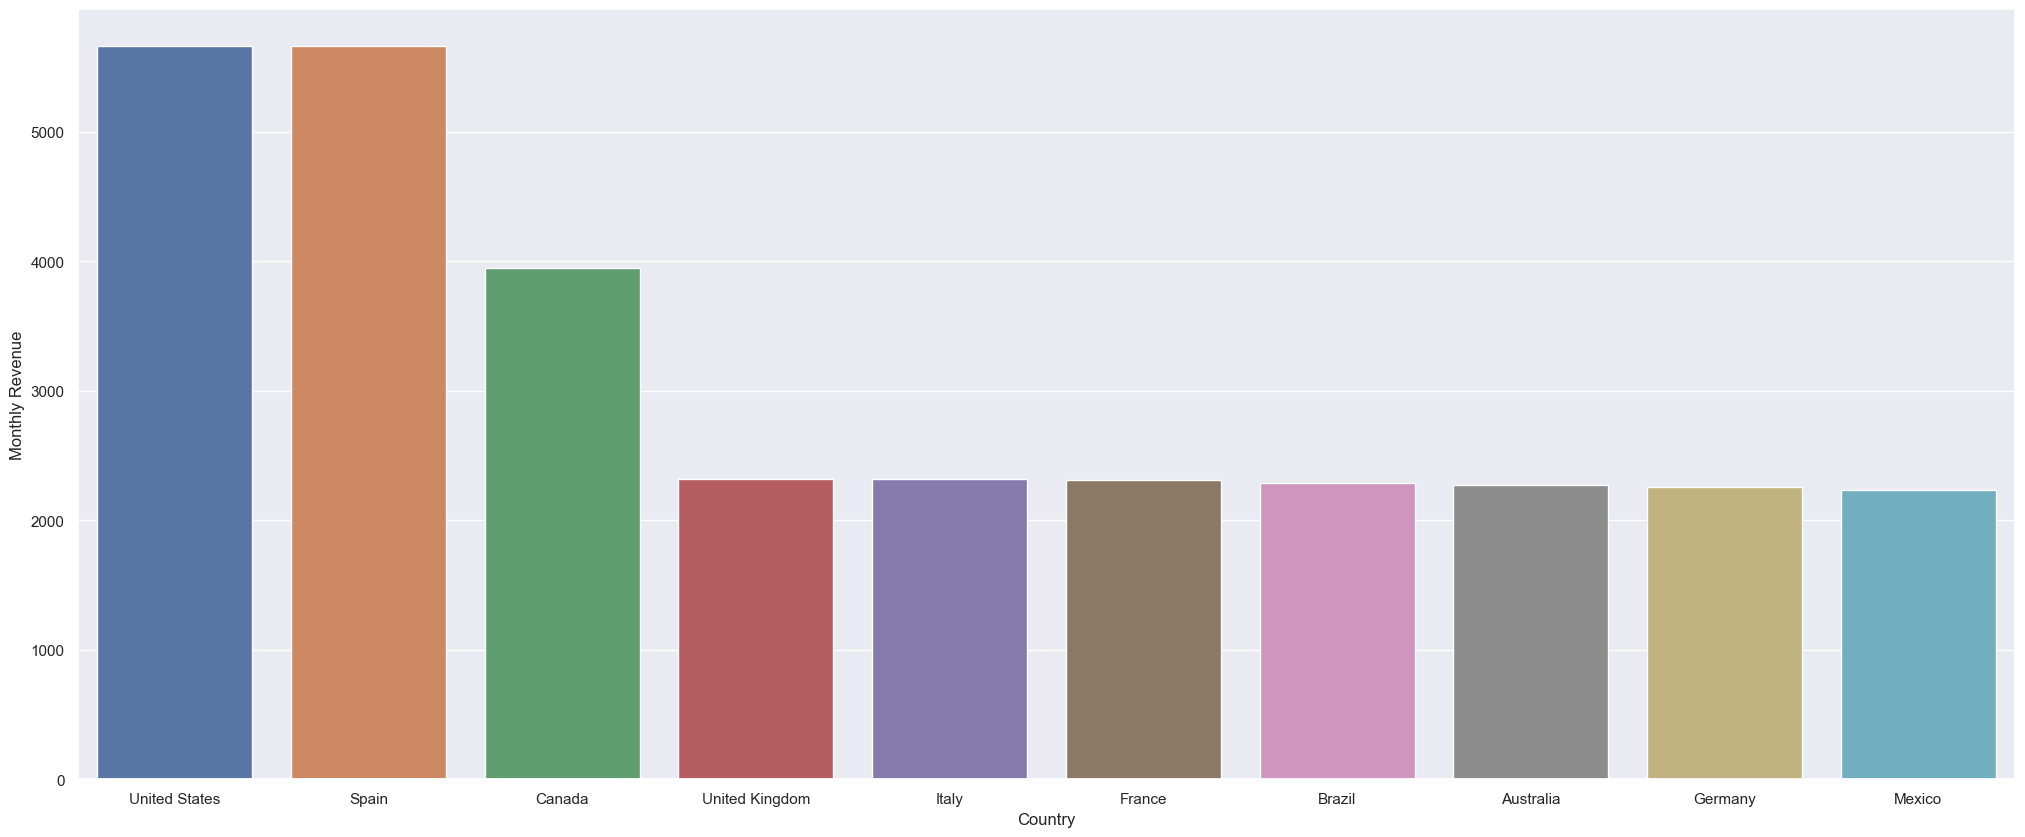

In [79]:
Country_revenue = df.groupby(['Country'], as_index=False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending=False)

sns.barplot(x = 'Country',y= 'Monthly Revenue' ,data = Country_revenue)
sns.set(rc={'figure.figsize':(25,10)})



###  Plotting a bar chart for gender info

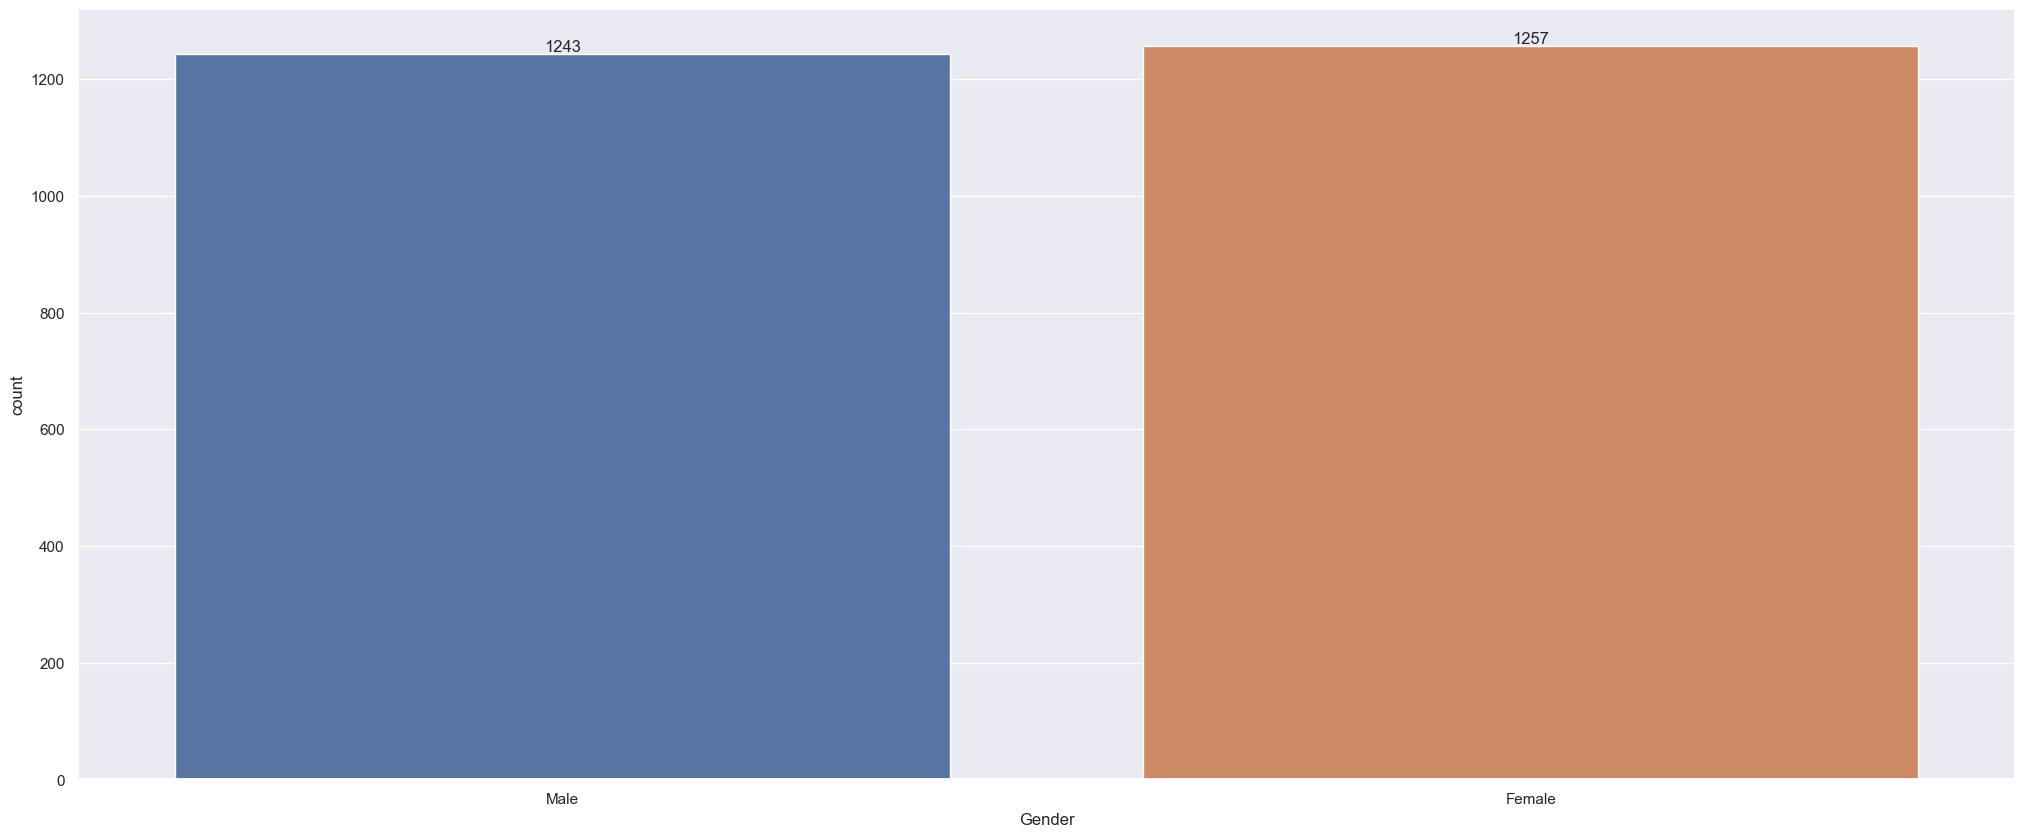

In [81]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

### Countplot between age and gender (Gender and Age Group Analysis)

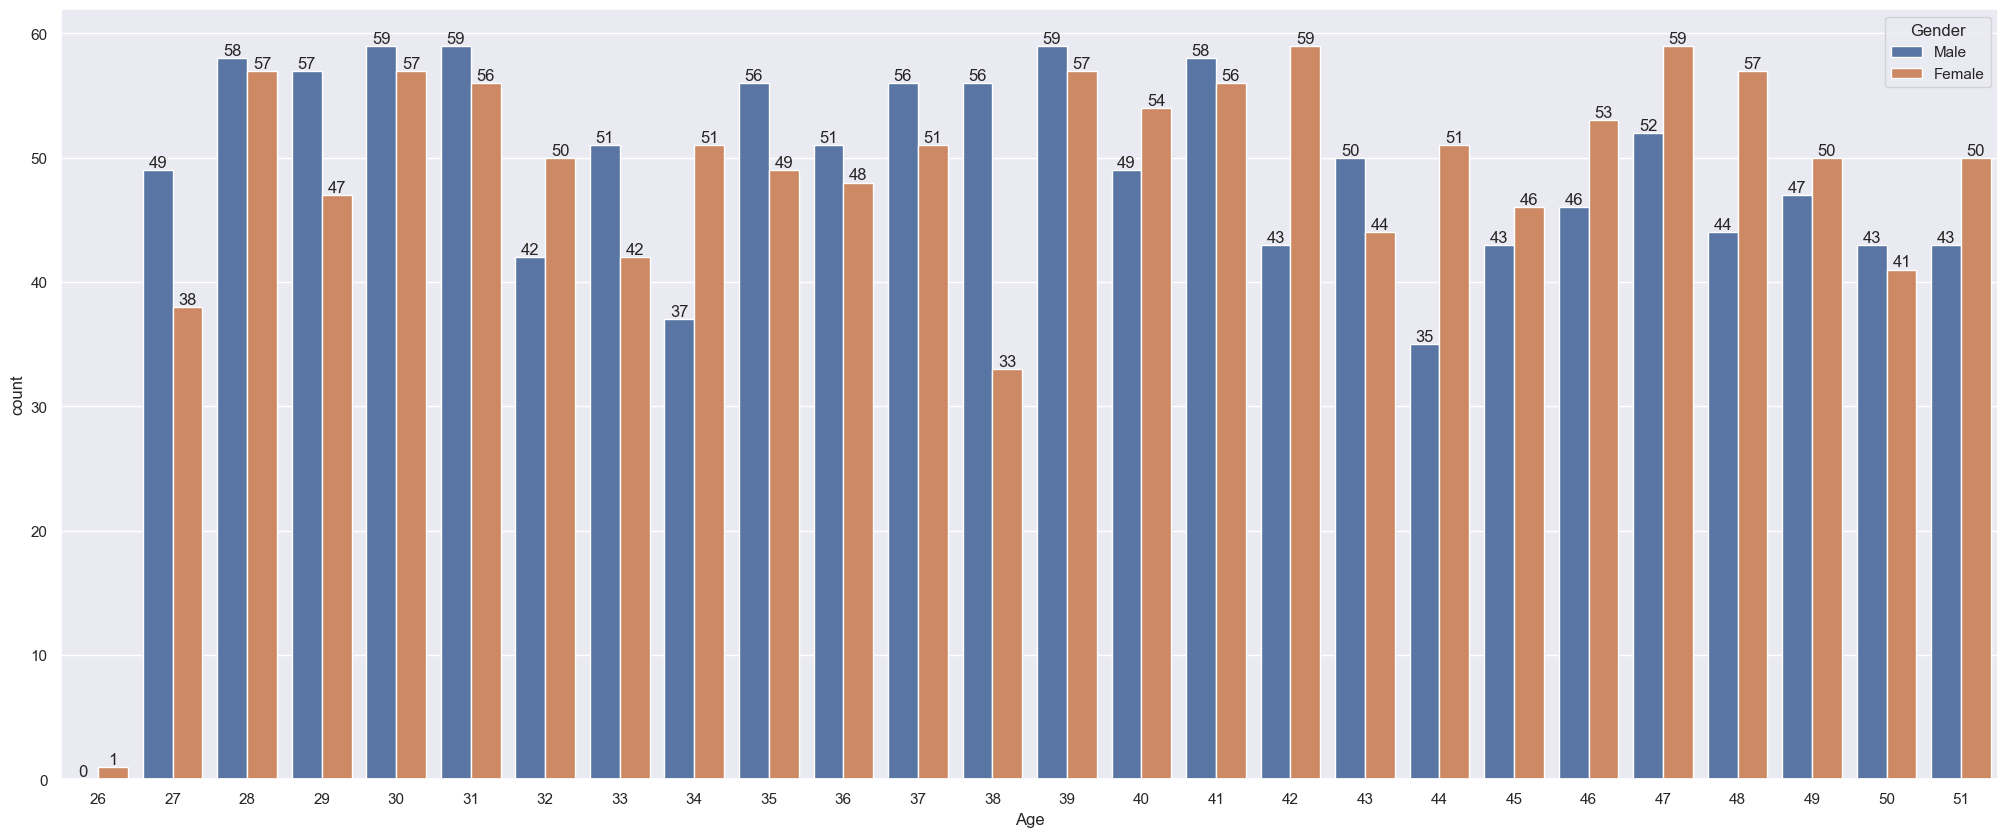

In [98]:
ax = sns.countplot(data = df, x = 'Age', hue = 'Gender')
df_sorted = df.sort_values(by='Gender', ascending=False)
df_sorted = df.sort_values(by='Age', ascending=False)

for bars in ax.containers:
    ax.bar_label(bars)

### Device Usage Analysis:

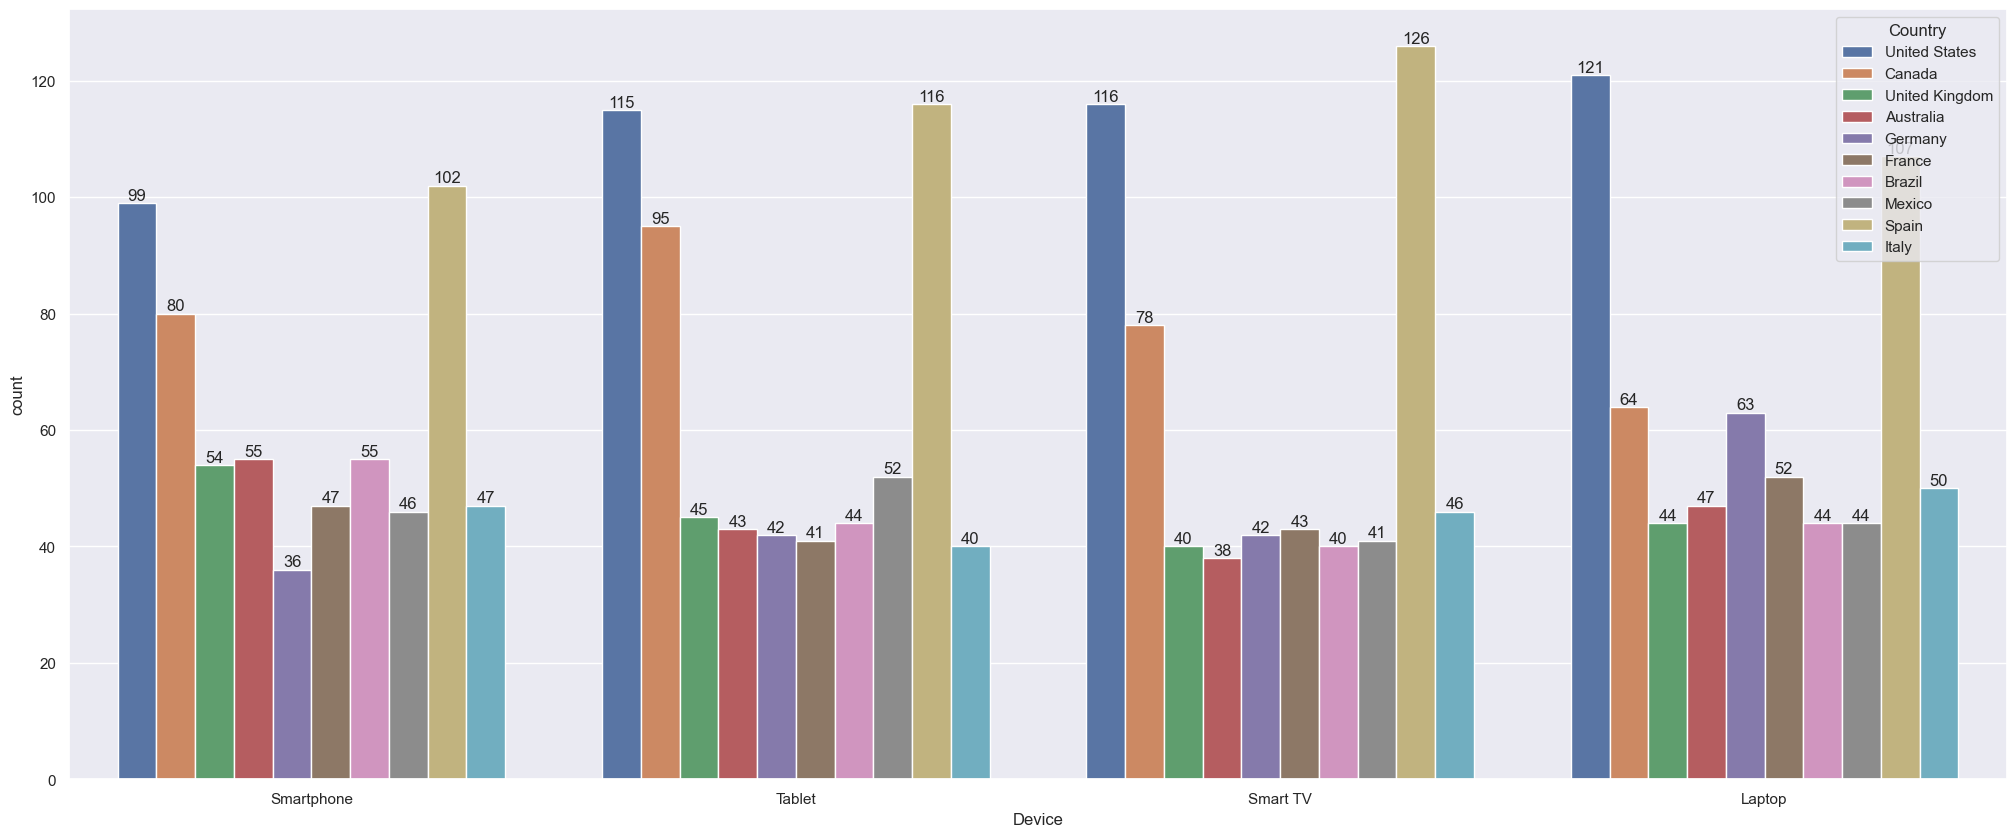

In [101]:
ax = sns.countplot(data = df, x = 'Device', hue = 'Country')
df_sorted = df.sort_values(by='Gender', ascending=False)
df_sorted = df.sort_values(by='Age', ascending=False)

for bars in ax.containers:
    ax.bar_label(bars)

### Subscription type count

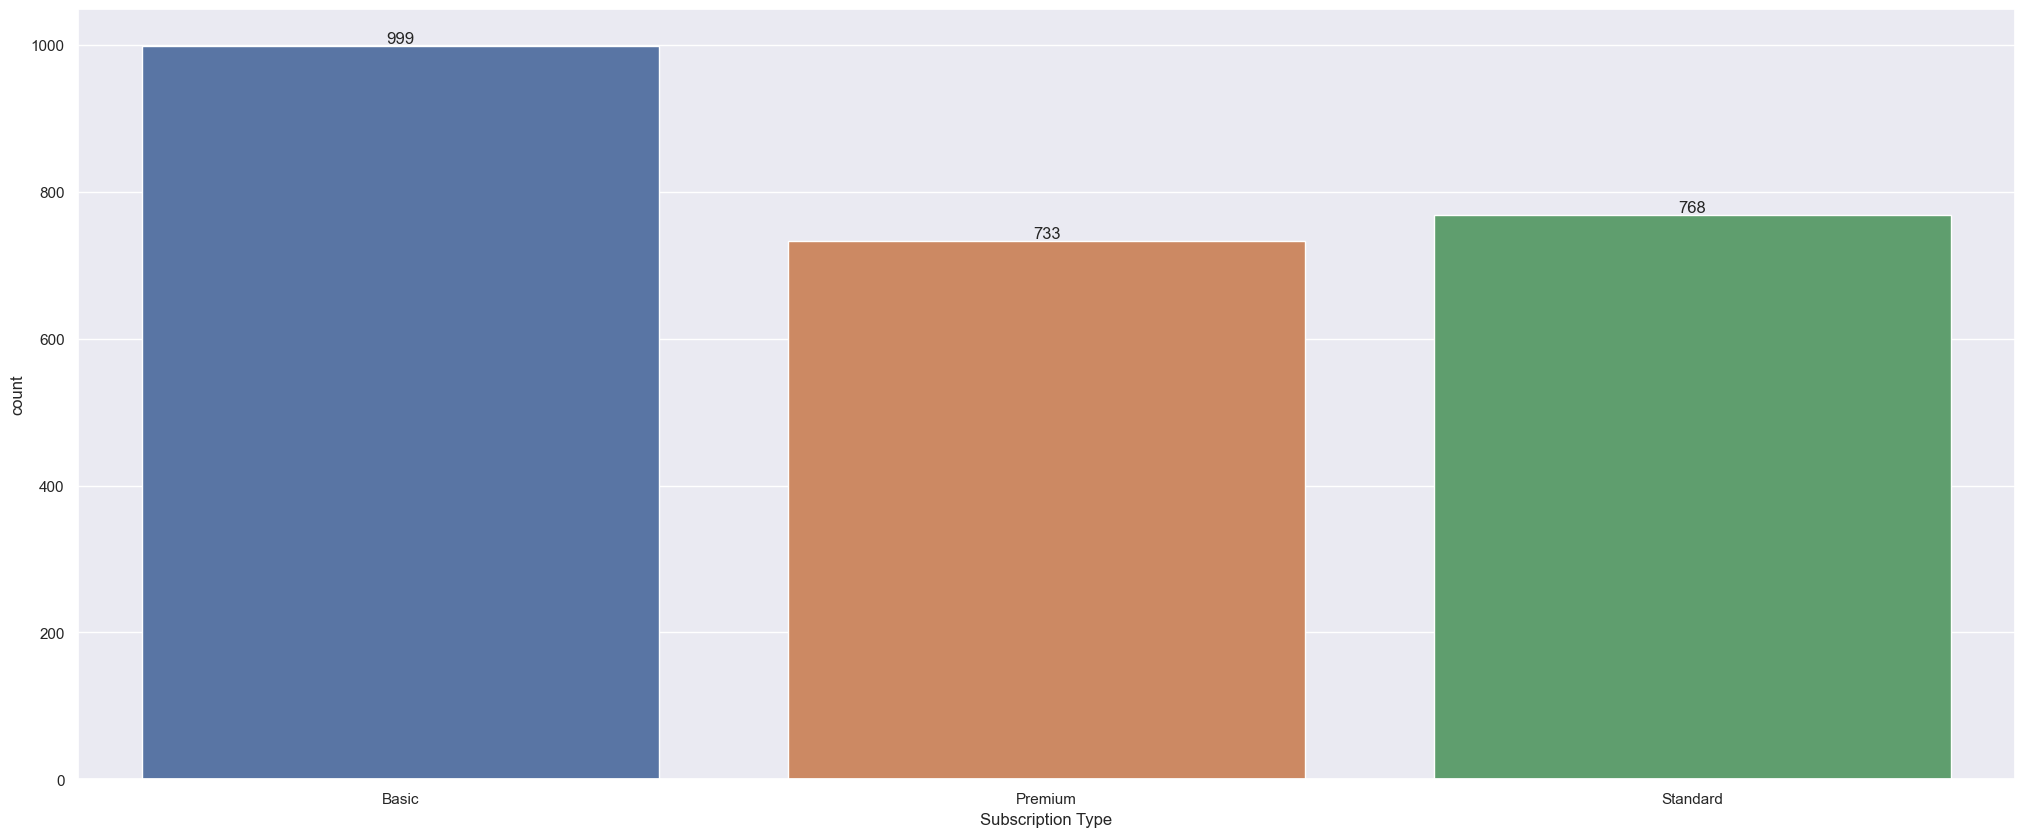

In [107]:
ax = sns.countplot(x = 'Subscription Type',data = df)

for bars in ax.containers:
    ax.bar_label(bars)


### Monthly Revenue Trends:

In [111]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
monthly_revenue_trends = df.groupby(pd.Grouper(key='Join Date', freq='M'))['Monthly Revenue'].sum()

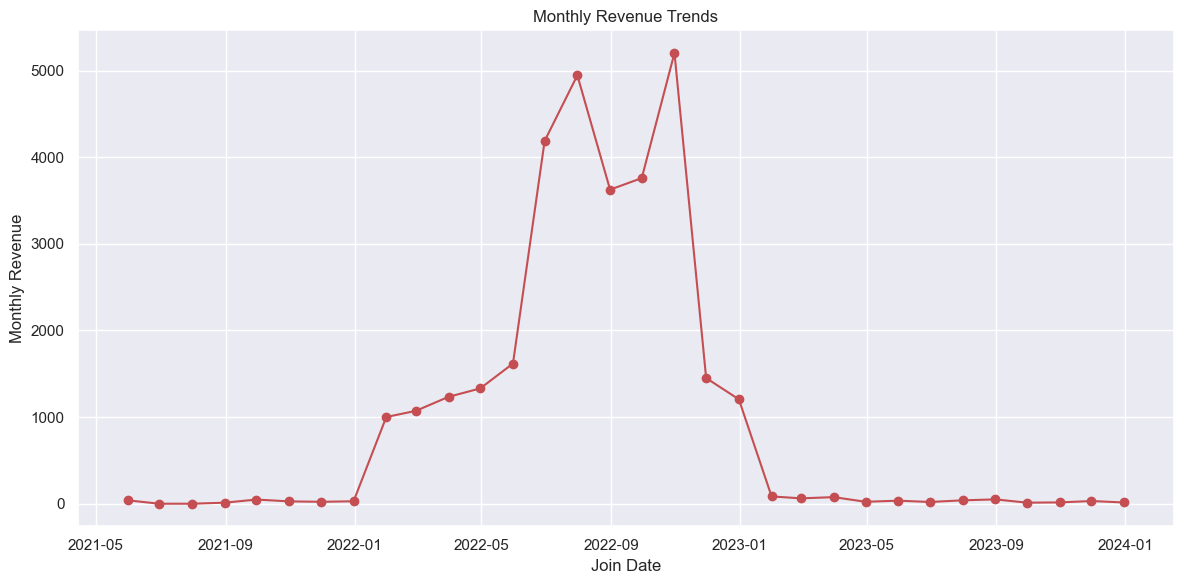

In [113]:
plt.figure(figsize=(12, 6))  
plt.plot(monthly_revenue_trends.index, monthly_revenue_trends.values, marker='o', linestyle='-', color='r')
plt.xlabel('Join Date')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue Trends')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion:

##### People from Usa and Canada use netflix more with basic type subscription and monthly reveneue of Usa and Canada is high compared to other countries